In [1]:
# Import dependencies 
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# reading csv file
csvpath = os.path.join('.', 'Datasets', 'age_and_sex.csv')

with open(csvpath) as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    csv_header = next(csvreader)

In [3]:
# convert to a df
file_path = 'Datasets/age_and_sex.csv'
raw_data_df = pd.read_csv(file_path)
raw_data_df.head(15)

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
0,Medicaid,Dental Services,Total,Total,3709,4264,4791,6246,8392,8493,9773,11889,12644,12637
1,Medicaid,Dental Services,0-18,Total,2085,2591,2938,3737,5012,4989,5216,6195,6340,6246
2,Medicaid,Dental Services,19-44,Total,937,984,1077,1405,1929,1938,2480,3029,3270,3315
3,Medicaid,Dental Services,45-64,Total,433,440,515,733,974,1071,1543,1952,2088,2117
4,Medicaid,Dental Services,65-84,Total,207,202,211,291,358,369,400,543,728,738
5,Medicaid,Dental Services,85+,Total,48,47,51,80,118,127,135,169,218,221
6,Medicaid,Dental Services,Total,Males,1563,1824,2043,2682,3639,3712,4254,5237,5569,5559
7,Medicaid,Dental Services,0-18,Males,1033,1285,1456,1865,2501,2497,2603,3088,3169,3125
8,Medicaid,Dental Services,19-44,Males,276,281,293,394,572,596,816,1043,1158,1174
9,Medicaid,Dental Services,45-64,Males,176,181,211,307,420,468,661,873,927,940


In [4]:
raw_data_df["Payer"].value_counts()

Payer
Medicare                     198
Other Payers and Programs    198
Out-of-Pocket                198
Total                        198
Medicaid                     180
Private health Insurance     180
Name: count, dtype: int64

In [5]:
# df for each age group
zero_18_df = raw_data_df[raw_data_df["Age Group"] == "0-18"]
zero_18_df[zero_18_df["Sex"] != "Total"]

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
7,Medicaid,Dental Services,0-18,Males,1033,1285,1456,1865,2501,2497,2603,3088,3169,3125
13,Medicaid,Dental Services,0-18,Females,1051,1305,1481,1872,2510,2493,2613,3107,3171,3121
25,Medicare,Dental Services,0-18,Males,0,0,0,0,0,0,0,0,0,0
31,Medicare,Dental Services,0-18,Females,0,0,0,0,0,0,0,0,0,0
43,Other Payers and Programs,Dental Services,0-18,Males,410,515,561,692,806,1026,1074,1255,1403,2469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,Out-of-Pocket,Total Personal Health Care,0-18,Females,10733,12182,14478,15135,14783,15388,15587,14873,16177,14452
1123,Private health Insurance,Total Personal Health Care,0-18,Males,37407,41298,50167,51967,53316,54933,53275,58268,60324,57018
1129,Private health Insurance,Total Personal Health Care,0-18,Females,36043,39652,42625,42831,47262,52792,50046,52886,55358,51281
1141,Total,Total Personal Health Care,0-18,Males,92905,105530,124294,134985,144282,150591,150865,158457,163458,173397


In [6]:
zero_18_df

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1,Medicaid,Dental Services,0-18,Total,2085,2591,2938,3737,5012,4989,5216,6195,6340,6246
7,Medicaid,Dental Services,0-18,Males,1033,1285,1456,1865,2501,2497,2603,3088,3169,3125
13,Medicaid,Dental Services,0-18,Females,1051,1305,1481,1872,2510,2493,2613,3107,3171,3121
19,Medicare,Dental Services,0-18,Total,0,0,0,0,0,0,0,0,0,0
25,Medicare,Dental Services,0-18,Males,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,Private health Insurance,Total Personal Health Care,0-18,Males,37407,41298,50167,51967,53316,54933,53275,58268,60324,57018
1129,Private health Insurance,Total Personal Health Care,0-18,Females,36043,39652,42625,42831,47262,52792,50046,52886,55358,51281
1135,Total,Total Personal Health Care,0-18,Total,178448,202201,232989,250925,270828,287823,288509,297986,308435,324242
1141,Total,Total Personal Health Care,0-18,Males,92905,105530,124294,134985,144282,150591,150865,158457,163458,173397


In [7]:
total_df = raw_data_df[raw_data_df["Payer"] == "Total"]
total_df

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
90,Total,Dental Services,Total,Total,73636,82189,91766,102762,105899,109700,114694,126197,137389,139313
91,Total,Dental Services,0-18,Total,19093,22843,25787,28007,28676,30925,30497,33178,33966,33643
92,Total,Dental Services,19-44,Total,20814,21996,22659,25224,24490,25225,26693,30148,32340,32316
93,Total,Dental Services,45-64,Total,23759,25209,28661,32575,33728,31366,32698,34524,37762,37152
94,Total,Dental Services,65-84,Total,9191,11051,13304,15016,17013,19993,22316,25779,30090,32832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,Total,Total Personal Health Care,0-18,Females,85543,96672,108695,115940,126545,137233,137644,139529,144977,150846
1148,Total,Total Personal Health Care,19-44,Females,206495,234299,262160,280048,296160,310934,338761,391206,431197,461702
1149,Total,Total Personal Health Care,45-64,Females,200289,247272,292000,329676,354531,373297,413856,475154,487918,523367
1150,Total,Total Personal Health Care,65-84,Females,209361,236079,259063,297283,317264,344705,367161,406104,454100,527153


In [8]:
persc_drugs = total_df[total_df["Service"] == "Prescription Drugs"]
persc_drugs

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1026,Total,Prescription Drugs,Total,Total,159812,195638,228099,244324,253371,256996,290642,313323,324170,350629
1027,Total,Prescription Drugs,0-18,Total,12801,15350,17813,17783,17985,18847,20090,19792,19028,19587
1028,Total,Prescription Drugs,19-44,Total,37535,43487,49398,46965,48245,47452,53539,61627,64853,70887
1029,Total,Prescription Drugs,45-64,Total,68711,87408,102013,108211,110997,111382,125759,135138,133603,137530
1030,Total,Prescription Drugs,65-84,Total,35583,42925,50490,61827,65878,69012,79672,84338,93452,107738
1031,Total,Prescription Drugs,85+,Total,5181,6467,8385,9539,10267,10304,11581,12429,13234,14887
1032,Total,Prescription Drugs,Total,Males,64582,80145,94851,107670,110442,116898,134439,143278,150987,160536
1033,Total,Prescription Drugs,0-18,Males,7272,8555,9951,10489,10495,11050,11581,11390,10708,10919
1034,Total,Prescription Drugs,19-44,Males,13464,15726,18434,17630,20108,19110,23737,27274,28365,29360
1035,Total,Prescription Drugs,45-64,Males,28978,37034,43824,50364,48743,53212,59621,62206,63082,64177


In [9]:
persc_drugs[persc_drugs["Sex"] == "Total"]

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1026,Total,Prescription Drugs,Total,Total,159812,195638,228099,244324,253371,256996,290642,313323,324170,350629
1027,Total,Prescription Drugs,0-18,Total,12801,15350,17813,17783,17985,18847,20090,19792,19028,19587
1028,Total,Prescription Drugs,19-44,Total,37535,43487,49398,46965,48245,47452,53539,61627,64853,70887
1029,Total,Prescription Drugs,45-64,Total,68711,87408,102013,108211,110997,111382,125759,135138,133603,137530
1030,Total,Prescription Drugs,65-84,Total,35583,42925,50490,61827,65878,69012,79672,84338,93452,107738
1031,Total,Prescription Drugs,85+,Total,5181,6467,8385,9539,10267,10304,11581,12429,13234,14887


In [10]:
female_spending_df = raw_data_df[raw_data_df["Sex"] == "Females"]
female_spending_df

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
12,Medicaid,Dental Services,Total,Females,2146,2441,2748,3564,4752,4781,5519,6651,7075,7078
13,Medicaid,Dental Services,0-18,Females,1051,1305,1481,1872,2510,2493,2613,3107,3171,3121
14,Medicaid,Dental Services,19-44,Females,661,703,783,1011,1357,1342,1664,1986,2112,2141
15,Medicaid,Dental Services,45-64,Females,257,260,304,425,555,603,882,1080,1161,1177
16,Medicaid,Dental Services,65-84,Females,138,134,139,191,235,243,256,349,464,471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,Total,Total Personal Health Care,0-18,Females,85543,96672,108695,115940,126545,137233,137644,139529,144977,150846
1148,Total,Total Personal Health Care,19-44,Females,206495,234299,262160,280048,296160,310934,338761,391206,431197,461702
1149,Total,Total Personal Health Care,45-64,Females,200289,247272,292000,329676,354531,373297,413856,475154,487918,523367
1150,Total,Total Personal Health Care,65-84,Females,209361,236079,259063,297283,317264,344705,367161,406104,454100,527153


In [11]:
female_total_out = female_spending_df[female_spending_df["Payer"] != "Total"]
female_total_out

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
12,Medicaid,Dental Services,Total,Females,2146,2441,2748,3564,4752,4781,5519,6651,7075,7078
13,Medicaid,Dental Services,0-18,Females,1051,1305,1481,1872,2510,2493,2613,3107,3171,3121
14,Medicaid,Dental Services,19-44,Females,661,703,783,1011,1357,1342,1664,1986,2112,2141
15,Medicaid,Dental Services,45-64,Females,257,260,304,425,555,603,882,1080,1161,1177
16,Medicaid,Dental Services,65-84,Females,138,134,139,191,235,243,256,349,464,471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,Private health Insurance,Total Personal Health Care,0-18,Females,36043,39652,42625,42831,47262,52792,50046,52886,55358,51281
1130,Private health Insurance,Total Personal Health Care,19-44,Females,99729,112721,126323,134770,138176,142564,151155,186278,206903,195463
1131,Private health Insurance,Total Personal Health Care,45-64,Females,91039,115227,139188,157776,163725,173709,186631,219431,224270,223209
1132,Private health Insurance,Total Personal Health Care,65-84,Females,32953,35233,32135,42756,43217,47024,48267,58450,62170,69550


In [12]:
fem_tot = female_total_out[female_total_out["Age Group"] == "Total"]
fem_tot

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
12,Medicaid,Dental Services,Total,Females,2146,2441,2748,3564,4752,4781,5519,6651,7075,7078
30,Medicare,Dental Services,Total,Females,43,39,57,122,133,202,227,285,667,1412
48,Other Payers and Programs,Dental Services,Total,Females,1252,1498,1720,1928,2271,2444,2662,2792,3035,7821
66,Out-of-Pocket,Dental Services,Total,Females,18288,20471,23838,26676,25744,26439,26588,29016,31538,29664
84,Private health Insurance,Dental Services,Total,Females,19381,21519,23433,25189,26409,28022,28906,30589,32569,31313
120,Medicaid,Durable Medical Equipment,Total,Females,1589,1691,2163,2442,2838,3076,3759,4379,4563,4800
138,Medicare,Durable Medical Equipment,Total,Females,2985,3510,3834,4357,4095,4393,4206,4109,4783,6025
156,Other Payers and Programs,Durable Medical Equipment,Total,Females,447,417,511,563,528,586,584,631,702,659
174,Out-of-Pocket,Durable Medical Equipment,Total,Females,9295,11088,12429,13313,11653,11652,12668,12872,13761,13830
192,Private health Insurance,Durable Medical Equipment,Total,Females,2582,2760,3926,4001,3775,4627,4925,5707,6730,5813


In [13]:
fem_tot["2020"].sum()

3637160

In [14]:
raw_data_df

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
0,Medicaid,Dental Services,Total,Total,3709,4264,4791,6246,8392,8493,9773,11889,12644,12637
1,Medicaid,Dental Services,0-18,Total,2085,2591,2938,3737,5012,4989,5216,6195,6340,6246
2,Medicaid,Dental Services,19-44,Total,937,984,1077,1405,1929,1938,2480,3029,3270,3315
3,Medicaid,Dental Services,45-64,Total,433,440,515,733,974,1071,1543,1952,2088,2117
4,Medicaid,Dental Services,65-84,Total,207,202,211,291,358,369,400,543,728,738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,Total,Total Personal Health Care,0-18,Females,85543,96672,108695,115940,126545,137233,137644,139529,144977,150846
1148,Total,Total Personal Health Care,19-44,Females,206495,234299,262160,280048,296160,310934,338761,391206,431197,461702
1149,Total,Total Personal Health Care,45-64,Females,200289,247272,292000,329676,354531,373297,413856,475154,487918,523367
1150,Total,Total Personal Health Care,65-84,Females,209361,236079,259063,297283,317264,344705,367161,406104,454100,527153


In [15]:
dental_services_filtered = raw_data_df[raw_data_df["Service"] == "Dental Services"]

In [16]:
dental_total_removed = dental_services_filtered[dental_services_filtered["Payer"] != "Total"]

In [17]:
dental_total_age_removed = dental_total_removed[dental_total_removed["Age Group"] != "Total"]

In [18]:
dental_total_age_sex_removed = dental_total_age_removed[dental_total_age_removed["Sex"] == "Total"]

In [19]:
dental_total_age_sex_removed["Payer"].value_counts()

Payer
Medicaid                     5
Medicare                     5
Other Payers and Programs    5
Out-of-Pocket                5
Private health Insurance     5
Name: count, dtype: int64

In [20]:
medicaid = dental_total_age_sex_removed[dental_total_age_sex_removed["Payer"] == "Medicaid"]

In [21]:
medicaid

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1,Medicaid,Dental Services,0-18,Total,2085,2591,2938,3737,5012,4989,5216,6195,6340,6246
2,Medicaid,Dental Services,19-44,Total,937,984,1077,1405,1929,1938,2480,3029,3270,3315
3,Medicaid,Dental Services,45-64,Total,433,440,515,733,974,1071,1543,1952,2088,2117
4,Medicaid,Dental Services,65-84,Total,207,202,211,291,358,369,400,543,728,738
5,Medicaid,Dental Services,85+,Total,48,47,51,80,118,127,135,169,218,221


In [22]:
medicaid_df = medicaid.loc[:,["Age Group", "2002", "2004",	"2006",	"2008",	"2010",	"2012",	"2014",	"2016",	"2018",	"2020"]]
medicaid_df

,Age Group,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1,0-18,2085,2591,2938,3737,5012,4989,5216,6195,6340,6246
2,19-44,937,984,1077,1405,1929,1938,2480,3029,3270,3315
3,45-64,433,440,515,733,974,1071,1543,1952,2088,2117
4,65-84,207,202,211,291,358,369,400,543,728,738
5,85+,48,47,51,80,118,127,135,169,218,221


In [23]:
# Set the index to 'Age Group' column for easier plotting
medicaid_reset_index_df = medicaid_df.set_index('Age Group', inplace=False)
medicaid_reset_index_df

,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
Age Group,,,,,,,,,,
0-18,2085,2591,2938,3737,5012,4989,5216,6195,6340,6246
19-44,937,984,1077,1405,1929,1938,2480,3029,3270,3315
45-64,433,440,515,733,974,1071,1543,1952,2088,2117
65-84,207,202,211,291,358,369,400,543,728,738
85+,48,47,51,80,118,127,135,169,218,221


In [24]:
# Rotate the df
medicaid_rotated_df = medicaid_reset_index_df.T
medicaid_rotated_df

Age Group,0-18,19-44,45-64,65-84,85+
2002,2085,937,433,207,48
2004,2591,984,440,202,47
2006,2938,1077,515,211,51
2008,3737,1405,733,291,80
2010,5012,1929,974,358,118
2012,4989,1938,1071,369,127
2014,5216,2480,1543,400,135
2016,6195,3029,1952,543,169
2018,6340,3270,2088,728,218
2020,6246,3315,2117,738,221


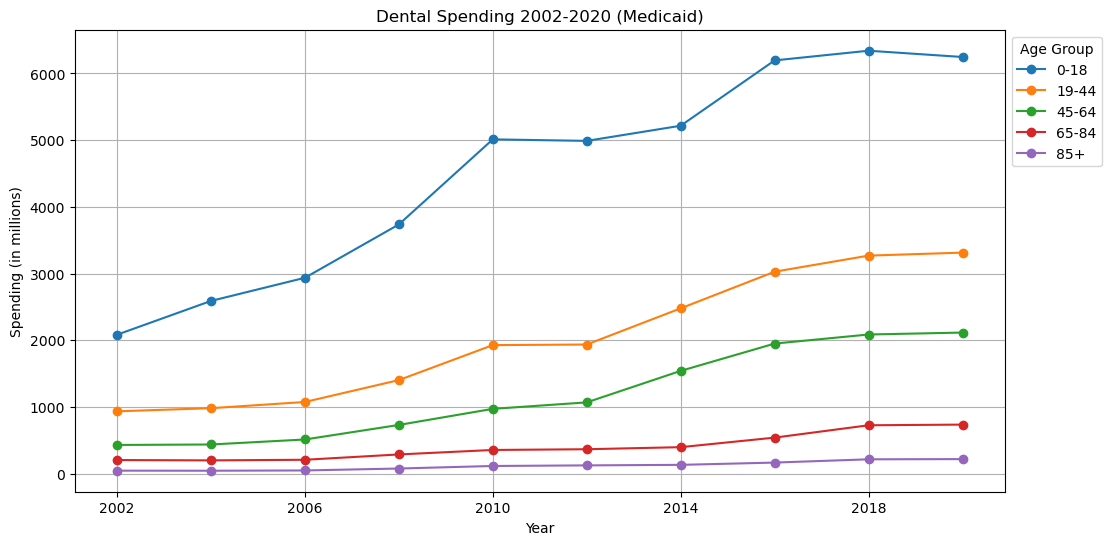

In [25]:
medicaid_rotated_df.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Dental Spending 2002-2020 (Medicaid)')
plt.xlabel('Year')
plt.ylabel('Spending (in millions)')
plt.legend(title='Age Group', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.savefig("Figures/medicaid_dental_spending.png")
plt.show()

# Dental spending by age group

In [27]:
dental_total = dental_services_filtered[dental_services_filtered["Payer"] == "Total"]
dental_total

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
90,Total,Dental Services,Total,Total,73636,82189,91766,102762,105899,109700,114694,126197,137389,139313
91,Total,Dental Services,0-18,Total,19093,22843,25787,28007,28676,30925,30497,33178,33966,33643
92,Total,Dental Services,19-44,Total,20814,21996,22659,25224,24490,25225,26693,30148,32340,32316
93,Total,Dental Services,45-64,Total,23759,25209,28661,32575,33728,31366,32698,34524,37762,37152
94,Total,Dental Services,65-84,Total,9191,11051,13304,15016,17013,19993,22316,25779,30090,32832
95,Total,Dental Services,85+,Total,779,1092,1354,1940,1992,2192,2489,2568,3231,3372
96,Total,Dental Services,Total,Males,32525,36222,39970,45283,46589,47811,50791,56863,62504,62026
97,Total,Dental Services,0-18,Males,8790,10784,11705,13150,13031,13769,13615,16039,17453,17222
98,Total,Dental Services,19-44,Males,8666,9009,9079,10173,9998,9759,10790,12913,13039,13138
99,Total,Dental Services,45-64,Males,10503,10768,12608,14387,14813,14391,14735,14735,16223,14521


In [28]:
dental_tot_ages = dental_total[dental_total["Age Group"] != "Total"]

In [29]:
dental_total_filtered = dental_tot_ages[dental_tot_ages["Sex"] == "Total"]

In [30]:
dental_loc = dental_total_filtered.loc[:,["Age Group", "2002", "2004",	"2006",	"2008",	"2010",	"2012",	"2014",	"2016",	"2018",	"2020"]]
dental_loc

,Age Group,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
91,0-18,19093,22843,25787,28007,28676,30925,30497,33178,33966,33643
92,19-44,20814,21996,22659,25224,24490,25225,26693,30148,32340,32316
93,45-64,23759,25209,28661,32575,33728,31366,32698,34524,37762,37152
94,65-84,9191,11051,13304,15016,17013,19993,22316,25779,30090,32832
95,85+,779,1092,1354,1940,1992,2192,2489,2568,3231,3372


In [31]:
dental_reset_index = dental_loc.set_index("Age Group", inplace=False)
dental_reset_index

,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
Age Group,,,,,,,,,,
0-18,19093,22843,25787,28007,28676,30925,30497,33178,33966,33643
19-44,20814,21996,22659,25224,24490,25225,26693,30148,32340,32316
45-64,23759,25209,28661,32575,33728,31366,32698,34524,37762,37152
65-84,9191,11051,13304,15016,17013,19993,22316,25779,30090,32832
85+,779,1092,1354,1940,1992,2192,2489,2568,3231,3372


In [32]:
dental_total_rotated = dental_reset_index.T
dental_total_rotated

Age Group,0-18,19-44,45-64,65-84,85+
2002,19093,20814,23759,9191,779
2004,22843,21996,25209,11051,1092
2006,25787,22659,28661,13304,1354
2008,28007,25224,32575,15016,1940
2010,28676,24490,33728,17013,1992
2012,30925,25225,31366,19993,2192
2014,30497,26693,32698,22316,2489
2016,33178,30148,34524,25779,2568
2018,33966,32340,37762,30090,3231
2020,33643,32316,37152,32832,3372


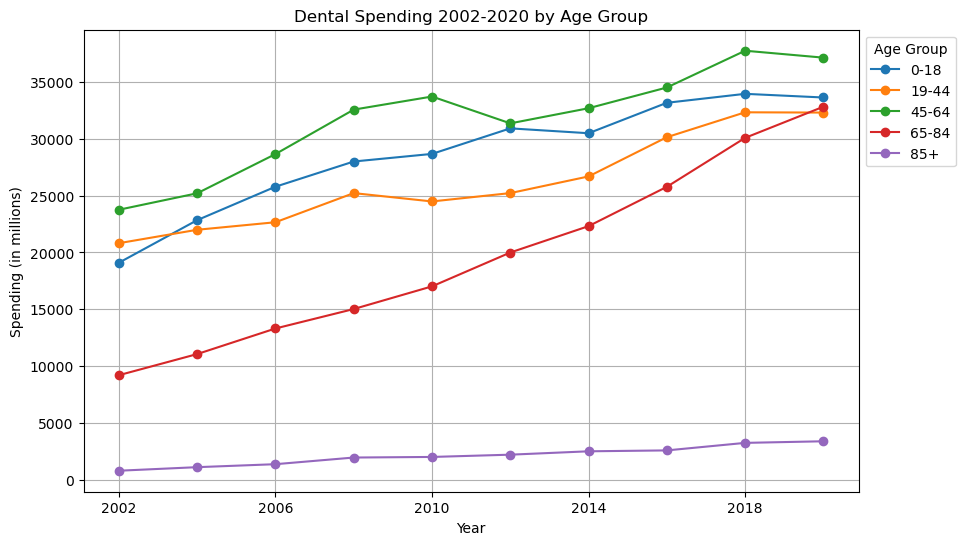

In [33]:
dental_total_rotated.plot(kind="line", marker="o", figsize=(10, 6))
plt.title('Dental Spending 2002-2020 by Age Group')
plt.xlabel('Year')
plt.ylabel('Spending (in millions)')
plt.legend(title='Age Group', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.savefig("Figures/dental_spending.png")
plt.show()

In [34]:
pvt_dent = dental_services_filtered[dental_services_filtered["Payer"] == "Private health Insurance"]
pvt_ageout = pvt_dent[pvt_dent["Age Group"] != "Total"]
pvt_df = pvt_ageout[pvt_ageout["Sex"] == "Total"]

In [35]:
pvt_dent_col = pvt_df.loc[:,["Age Group", "2002", "2004",	"2006",	"2008",	"2010",	"2012",	"2014",	"2016",	"2018",	"2020"]]
pvt_dent_col

,Age Group,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
73,0-18,8588,10657,11683,12182,11914,14143,13395,13852,14118,12782
74,19-44,11187,11893,12010,12545,12995,13393,14288,15337,16451,15454
75,45-64,12159,12520,13814,15877,16941,14881,15953,16635,18605,16869
76,65-84,2967,3662,3952,4172,5573,6667,8253,9225,10479,10413
77,85+,130,253,256,501,496,521,675,559,852,676


In [36]:
pvt_dent_total_index = pvt_dent_col.set_index("Age Group", inplace=False)
pvt_dent_total_index

,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
Age Group,,,,,,,,,,
0-18,8588,10657,11683,12182,11914,14143,13395,13852,14118,12782
19-44,11187,11893,12010,12545,12995,13393,14288,15337,16451,15454
45-64,12159,12520,13814,15877,16941,14881,15953,16635,18605,16869
65-84,2967,3662,3952,4172,5573,6667,8253,9225,10479,10413
85+,130,253,256,501,496,521,675,559,852,676


In [37]:
pvt_dent_total_rot = pvt_dent_total_index.T
pvt_dent_total_rot

Age Group,0-18,19-44,45-64,65-84,85+
2002,8588,11187,12159,2967,130
2004,10657,11893,12520,3662,253
2006,11683,12010,13814,3952,256
2008,12182,12545,15877,4172,501
2010,11914,12995,16941,5573,496
2012,14143,13393,14881,6667,521
2014,13395,14288,15953,8253,675
2016,13852,15337,16635,9225,559
2018,14118,16451,18605,10479,852
2020,12782,15454,16869,10413,676


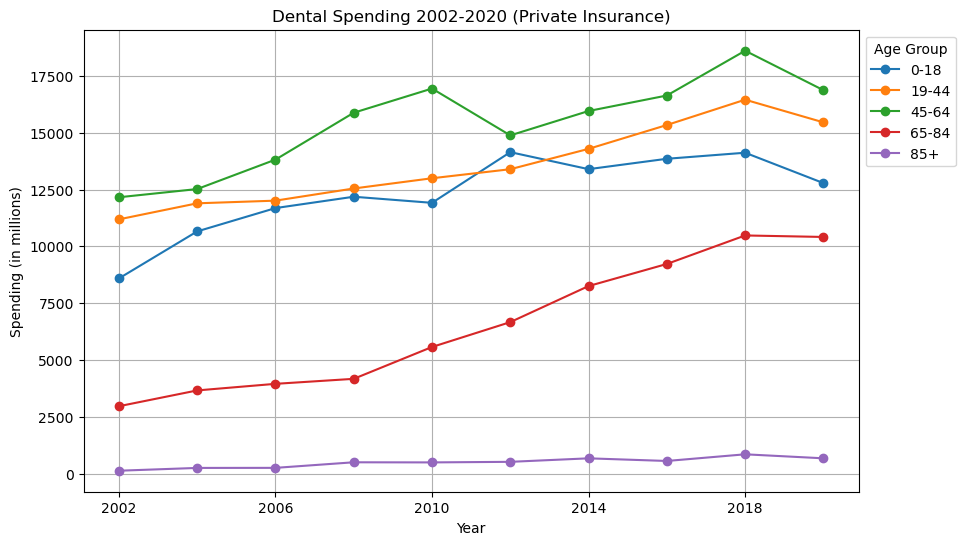

In [38]:
pvt_dent_total_rot.plot(kind="line", marker="o", figsize=(10, 6))
plt.title('Dental Spending 2002-2020 (Private Insurance)')
plt.xlabel('Year')
plt.ylabel('Spending (in millions)')
plt.legend(title='Age Group', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.savefig("Figures/dental_spending_pvt.png")
plt.show()

# Perscription drug exploration

In [207]:
persc_filtered = persc_drugs[(persc_drugs["Age Group"] == "Total") & (persc_drugs["Sex"] != "Total")]
persc_filtered

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1032,Total,Prescription Drugs,Total,Males,64582,80145,94851,107670,110442,116898,134439,143278,150987,160536
1038,Total,Prescription Drugs,Total,Females,95231,115493,133248,136654,142930,140098,156203,170044,173183,190094


In [221]:
persc_col = persc_filtered.loc[:,["Sex", "2002", "2004","2006",	"2008",	"2010",	"2012",	"2014",	"2016",	"2018",	"2020"]]
persc_col

,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1032,Males,64582,80145,94851,107670,110442,116898,134439,143278,150987,160536
1038,Females,95231,115493,133248,136654,142930,140098,156203,170044,173183,190094


In [223]:
persc_index = persc_col.set_index("Age Group", inplace=False)
persc_index

KeyError: "None of ['Age Group'] are in the columns"

In [225]:
persc_zero = persc_index.index
# persc_category = persc_zero.unique()
col1 = persc_index["2002"]
col2 = persc_index["2004"]
col3 = persc_index["2006"]
col4 = persc_index["2008"]
col5 = persc_index["2010"]
col6 = persc_index["2012"]
col7 = persc_index["2014"]
col8 = persc_index["2016"]
col9 = persc_index["2018"]
col10 = persc_index["2020"]

In [227]:
persc_bar = {
    "Age Group": persc_zero,
    "2002": col1,
    "2004": col2,
    "2006": col3,
    "2008": col4,
    "2010": col5,
    "2012": col6,
    "2014": col7,
    "2016": col8,
    "2018": col9,
    "2020": col10,
}

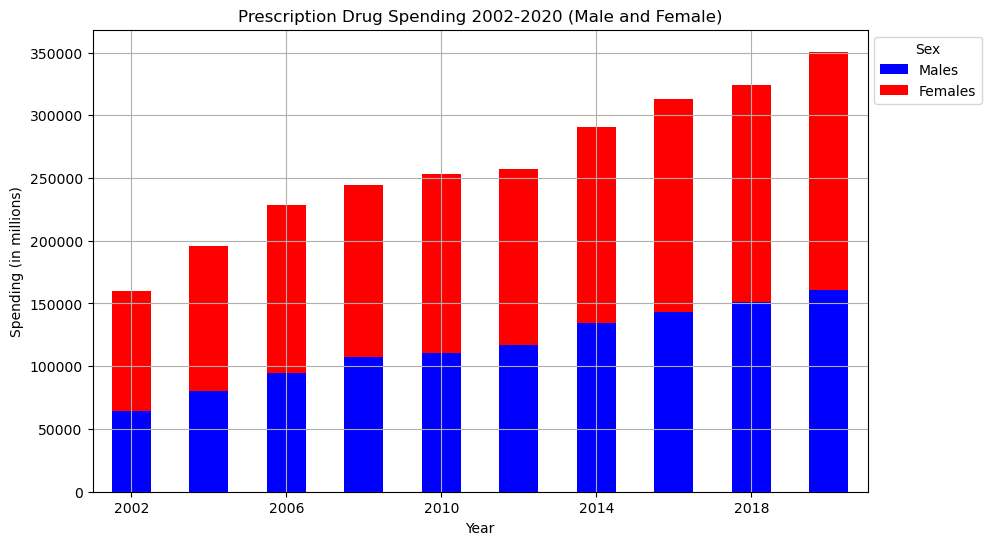

In [241]:
# Assuming "persc_col" is the DataFrame containing the data

# Set the 'Sex' column as the index
persc_col

# Plotting the DataFrame as a stacked bar graph
ax = persc_col.T.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'red'])

# Set the title and axis labels
plt.title('Prescription Drug Spending 2002-2020 (Male and Female)')
plt.xlabel('Year')
plt.ylabel('Spending (in millions)')

# Add legend and adjust its position
plt.legend(title='Sex', bbox_to_anchor=(1, 1))

# Display grid lines
plt.grid(True)

# Set x-axis ticks to show every other value
plt.xticks(range(len(persc_col.columns))[::2], persc_col.columns[::2], rotation=0)

# Save the figure as a PNG file
plt.savefig("Figures/drug_spending_yoy.png")

# Show the plot
plt.show()

In [139]:
persc_rot = persc_index.T
persc_rot

Sex,Males,Males,Males,Males,Males,Females,Females,Females,Females,Females
Age Group,0-18,19-44,45-64,65-84,85+,0-18,19-44,45-64,65-84,85+
2002,7272,13464,28978,13437,1430,5530,24071,39733,22146,3751
2004,8555,15726,37034,17040,1791,6795,27761,50375,25885,4677
2006,9951,18434,43824,20211,2432,7863,30965,58189,30279,5953
2008,10489,17630,50364,26272,2915,7294,29335,57847,35555,6623
2010,10495,20108,48743,27818,3278,7490,28137,62254,38060,6989
2012,11050,19110,53212,30086,3440,7796,28342,58170,38926,6864
2014,11581,23737,59621,35418,4082,8509,29802,66138,44255,7500
2016,11390,27274,62206,37830,4578,8402,34352,72932,46508,7850
2018,10708,28365,63082,43763,5070,8321,36488,70520,49689,8164


<Axes: >

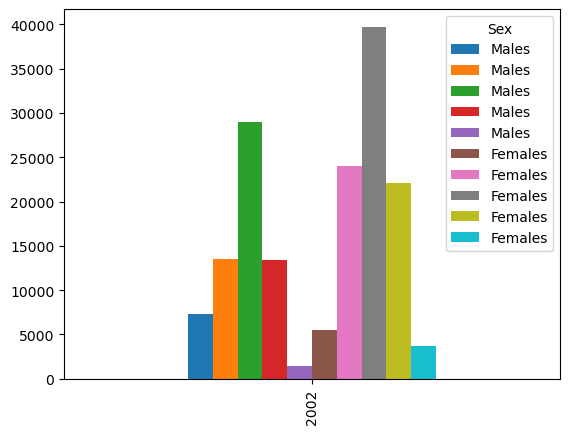

In [111]:
persc_rot.plot(kind="bar")

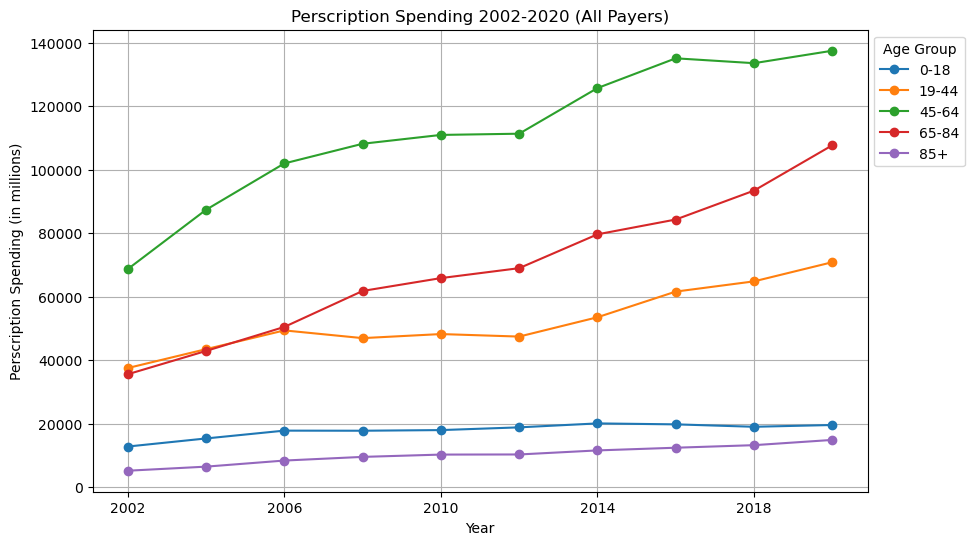

In [624]:
persc_rot.plot(kind="line", marker="o", figsize=(10, 6))
plt.title('Perscription Spending 2002-2020 (All Payers)')
plt.xlabel('Year')
plt.ylabel('Perscription Spending (in millions)')
plt.legend(title='Age Group', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.savefig("Figures/perscription_spending.png")
plt.show()